Compare temperatures in nowcast-blue and nowcast-green

In [12]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import viz_tools
from salishsea_tools import visualisations as vis

%matplotlib inline

In [16]:
grid = nc.Dataset(
        '/ocean/sallen/allen/research/MEOPAR/nemo-forcing/grid/bathy_downonegrid2.nc',
        'r')
bathy = grid.variables['Bathymetry'][:, :]
lons = grid.variables['nav_lon'][:, :]
lats = grid.variables['nav_lat'][:, :]
grid.close()

In [42]:
blue = nc.Dataset('/results/SalishSea/nowcast-blue/14jan17/SalishSea_1d_20170114_20170114_grid_T.nc')
Tblue = blue.variables['votemper'][0]
Sblue = blue.variables['vosaline'][0]
deptht = blue.variables['deptht'][:]
blue.close()

In [25]:
green = nc.Dataset('/results/SalishSea/nowcast-green/14jan17/SalishSea_1d_20170114_20170114_grid_T.nc')
Tgreen = green.variables['votemper'][0]
Sgreen = green.variables['vosaline'][0]
green.close()

In [26]:
mesh_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
tmask = 1-mesh_mask['tmask'][:]
temp_blue = np.ma.array(Tblue, mask=tmask)
temp_green = np.ma.array(Tgreen, mask=tmask)
sal_blue = np.ma.array(Sblue, mask=tmask)
sal_green = np.ma.array(Sgreen, mask=tmask)

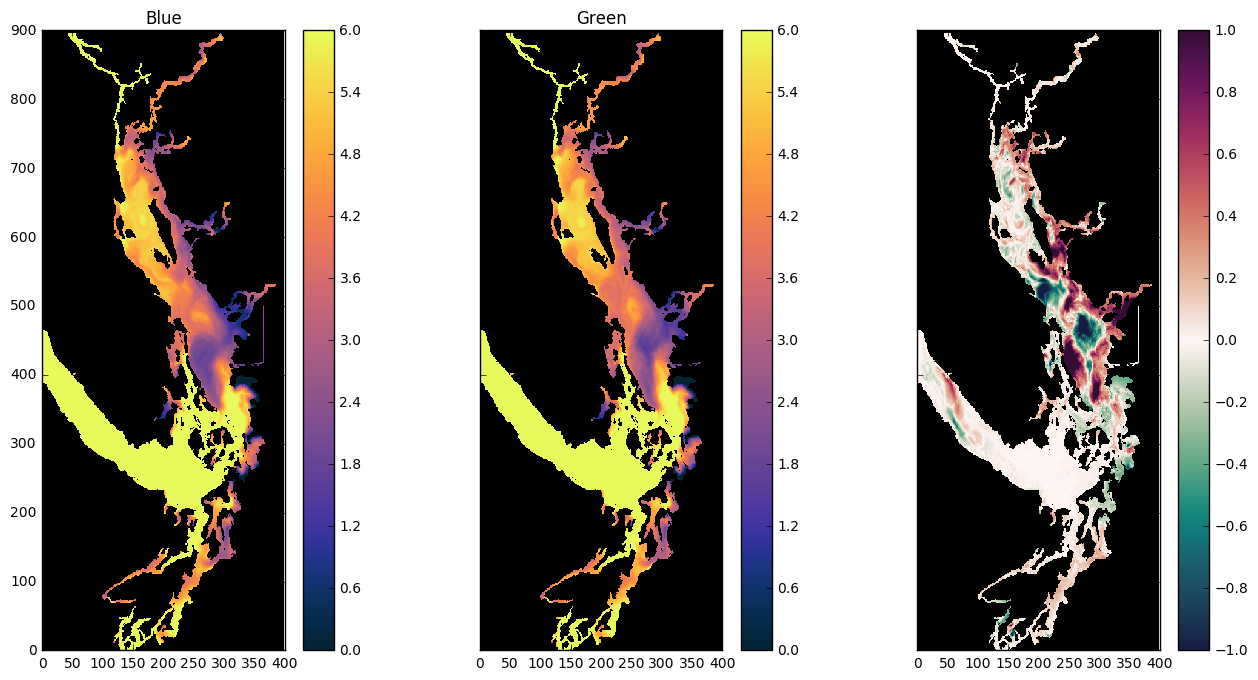

In [10]:
level = 0
fig, axs = plt.subplots(1, 3, figsize=(16,8), sharey=True)
cmap = plt.get_cmap(cm.thermal)
cmap2 = plt.get_cmap(cm.curl)
cmap.set_bad('black')
cmap2.set_bad('black')

# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(temp_blue[level], cmap=cmap, vmax=6, vmin=0)
axs[0].set_title('Blue')
cbar=fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(temp_green[level], cmap=cmap, vmax=6, vmin=0)
axs[1].set_title('Green')
cbar=fig.colorbar(mesh, ax=axs[1])
# third one
viz_tools.set_aspect(axs[2])
mesh = axs[2].pcolormesh(temp_green[level]-temp_blue[level],cmap=cmap2, vmax=1, vmin=-1)
cbar=fig.colorbar(mesh, ax=axs[2])


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


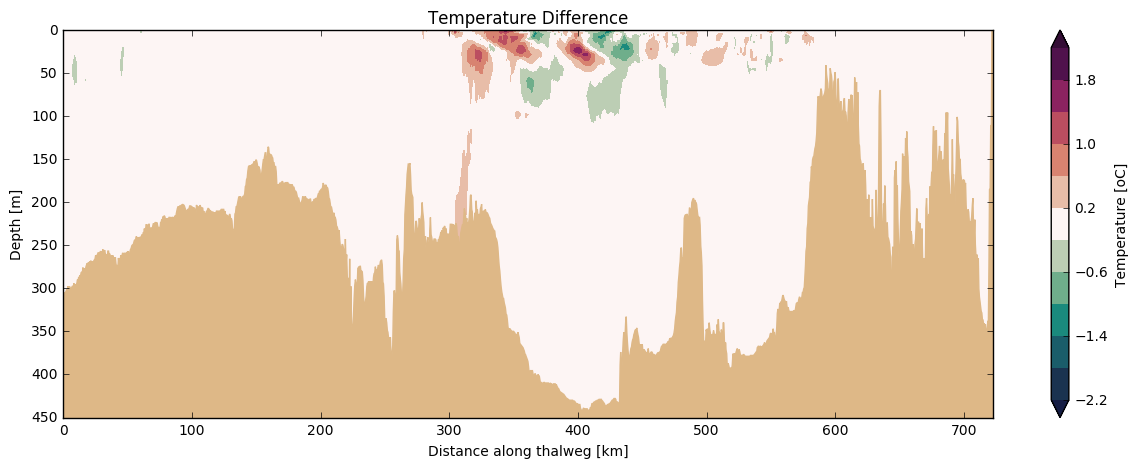

In [23]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, temp_green-temp_blue, bathy, lons, lats, mesh_mask, 'gdept_0', 
                           [-2.2, -1.8, -1.4, -1, -0.6, -0.2, 0.2, 0.6, 1, 1.4, 1.8, 2.2], 
                           cmap=cmap2)
ax.set_ylim([450,0])
cbar.set_label('Temperature [oC]')
ax.set_title('Temperature Difference');

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


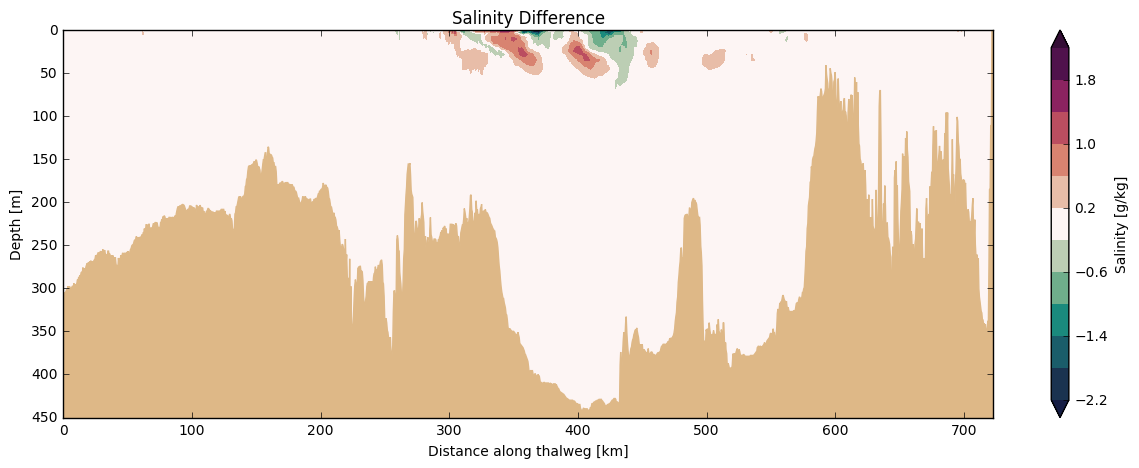

In [27]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, sal_green-sal_blue, bathy, lons, lats, mesh_mask, 'gdept_0', 
                           [-2.2, -1.8, -1.4, -1, -0.6, -0.2, 0.2, 0.6, 1, 1.4, 1.8, 2.2], 
                           cmap=cmap2)
ax.set_ylim([450,0])
cbar.set_label('Salinity [g/kg]')
ax.set_title('Salinity Difference');

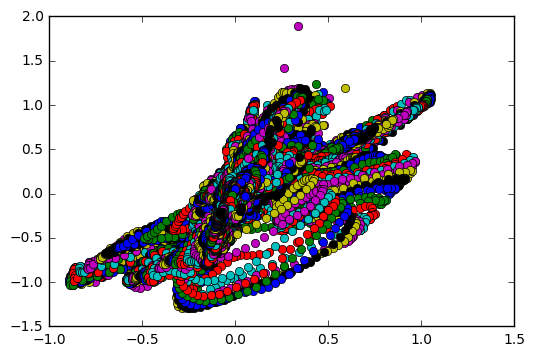

In [35]:
plt.plot(sal_green[22] - sal_blue[22], temp_green[22] - temp_blue[22], 'o');

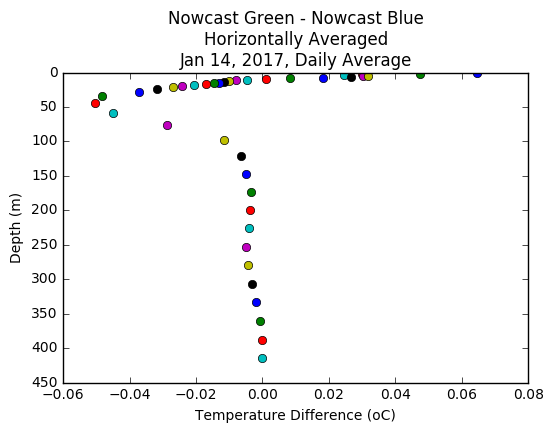

In [54]:
fig, ax = plt.subplots(1,1)
for level in range(39):
    ax.plot(np.mean(temp_green[level])-np.mean(temp_blue[level]), deptht[level], 'o')
ax.invert_yaxis()
ax.set_title('Nowcast Green - Nowcast Blue\nHorizontally Averaged\nJan 14, 2017, Daily Average')
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Temperature Difference (oC)')